In [1]:
#Import all libraries here
import os
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from mlxtend.plotting import plot_confusion_matrix
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
os.chdir('E:/Study/SIT719 - Analytics For Security and Privacy/Ontrack Tasks/Task5/')

In [2]:
#Reading our raw data
df=pd.read_csv('Processed_Combined_IoT_dataset.csv')
print(df.shape)
df.head()

(401119, 18)


,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,current_temperature,door_state,fridge_temperature,humidity,latitude,light_status,longitude,motion_status,pressure,sphone_signal,temp_condition,temperature,thermostat_status,label
0,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.930769,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0
1,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.588462,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0
2,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.076923,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1,0
3,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.292308,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1,0
4,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.746154,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0


In [3]:
target_cols=list(df.columns[-1:])
print(target_cols)

feature_cols= list(df.columns[:-1])
print(feature_cols)

['label']
['FC1_Read_Input_Register', 'FC2_Read_Discrete_Value', 'FC3_Read_Holding_Register', 'FC4_Read_Coil', 'current_temperature', 'door_state', 'fridge_temperature', 'humidity', 'latitude', 'light_status', 'longitude', 'motion_status', 'pressure', 'sphone_signal', 'temp_condition', 'temperature', 'thermostat_status']


In [4]:
#split dataset in features and target variable
X = df.drop('label', axis=1) # Features
y = df['label'] # Target variable

### Doing 70-30 split of our dataset

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,test_size=0.30, random_state=55)

### Classification steps starts from here

<b> Step 6 : Predictive Modelling </b> 

Here we have used 5 classifier for our dataset and we have predicted the accuracy, error, f1 score, etc

<n> <b> 1) Decision Tree </b> </n>
<br> <b> 2) Random Forest </b> </br>
<br> <b> 3) K-Nearest Neighbor(KNN) </b> </br>
<br> <b> 4) XGBoost </b> </br>
<br> <b> 5) Gradient Boosting(GBM) </b> </br>


#### 1) Decision tree

In [6]:
#Iteration 1

t0 = time.time()
decision_classifier = DecisionTreeClassifier(random_state=55)
decision_classifier.fit(X_train, y_train)

pred_y = decision_classifier.predict(X_test)
t1 = time.time()

results = confusion_matrix(y_test, pred_y)
error = zero_one_loss(y_test, pred_y)
accuracy = accuracy_score(pred_y, y_test)

print('Time taken:- ', t1-t0, 'secs')
print('Confusion Matrix:-' ,results)
print('Accuracy of our Decision tree model is:-', accuracy)
print('Error of our Decision tree model is:-',error)

Time taken:-  2.8463072776794434 secs
Confusion Matrix:- [[69226  4354]
 [12013 34743]]
Accuracy of our Decision tree model is:- 0.8639891636750432
Error of our Decision tree model is:- 0.1360108363249568


In [7]:
#Iteration 2

t0 = time.time()
decision_classifier = DecisionTreeClassifier(random_state=55, criterion='entropy', min_samples_split=3, splitter='random')
decision_classifier.fit(X_train, y_train)

pred_y = decision_classifier.predict(X_test)
t1 = time.time()

results = confusion_matrix(y_test, pred_y)
error = zero_one_loss(y_test, pred_y)
accuracy = accuracy_score(pred_y, y_test)

print('Time taken:- ', t1-t0, 'secs')
print('Confusion Matrix:-' ,results)
print('Accuracy of our Decision tree model is:-', accuracy)
print('Error of our Decision tree model is:-',error)

Time taken:-  1.4132044315338135 secs
Confusion Matrix:- [[70796  2784]
 [12832 33924]]
Accuracy of our Decision tree model is:- 0.8702300226033772
Error of our Decision tree model is:- 0.12976997739662277


In [8]:
#Model evaluation
print(results)
print(classification_report(y_test,pred_y))

[[70796  2784]
 [12832 33924]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     73580
           1       0.92      0.73      0.81     46756

    accuracy                           0.87    120336
   macro avg       0.89      0.84      0.86    120336
weighted avg       0.88      0.87      0.87    120336



In [9]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, pred_y)*100)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, pred_y, average='weighted')*100)

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, pred_y, average='weighted')*100)

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, pred_y, average='weighted')*100)

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, pred_y)*100)

# ROC AUC
print('ROC_AUC Score:',metrics.roc_auc_score(y_test, pred_y)*100)

Accuracy: 87.02300226033772
Precision: 87.67095574951674
Recall: 87.02300226033772
F1 Score: 86.65658433324795
Cohens kappa: 71.57551506253358
ROC_AUC Score: 84.38587855114584


###### FPR, TPR Calculation based on confusion matrix

In [10]:
FP = results.sum(axis=0) - np.diag(results)  
FN = results.sum(axis=1) - np.diag(results)
TP = np.diag(results)
TN = results.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)

print('False Alarm Rate (FPR) is:',list(FPR))

False Alarm Rate (FPR) is: [0.2744460603986654, 0.03783636857841805]


#### K-Fold cross validation for sample but we wont use this as final model

In [11]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold

kfolds = KFold(n_splits=10, random_state=55)
t0=time.time()
kfold_score = cross_val_score(DecisionTreeClassifier(random_state=55), X, y, cv = kfolds)    #cv is the number of folds, scores will give an array of scores
t1=time.time()
print('kfold_score:',kfold_score)
print('kfold_mean_score:',np.mean(kfold_score))
print('Time taken for 5 fold validation is:' ,t1-t0)

kfold_score: [1.         0.72678999 0.58840247 0.45759374 0.59877343 0.9454278
 0.84992022 0.53068907 0.51194156 0.41861335]
kfold_mean_score: 0.6628151640739628
Time taken for 5 fold validation is: 31.640350818634033


#### 2) Random forest

In [12]:
#Iteration 1

t0=time.time()
randomforest_clf= RandomForestClassifier(random_state=55, n_jobs=-1)

randomforest_clf.fit(X_train, y_train)

pred_y2 = randomforest_clf.predict(X_test)
t1 = time.time()

results_rf = confusion_matrix(y_test, pred_y2)
error_rf = zero_one_loss(y_test, pred_y2)
accuracy_rf = accuracy_score(pred_y2, y_test)

print('Time taken:- ', t1-t0, 'secs')
print('Confusion Matrix:-' ,results_rf)
print('Accuracy of our Random Forest model is:-', accuracy_rf)
print('Error of our Random Forest model is:-',error_rf)

Time taken:-  51.97771620750427 secs
Confusion Matrix:- [[69825  3755]
 [11946 34810]]
Accuracy of our Random Forest model is:- 0.8695236670655498
Error of our Random Forest model is:- 0.13047633293445016


In [13]:
#Iteration 2

t0=time.time()
randomforest_clf= RandomForestClassifier(random_state=55, n_estimators=700, min_samples_split=6, n_jobs=-1)
# randomforest_clf= RandomForestClassifier(random_state=55, n_estimators=300, min_samples_split=5, n_jobs=-1)

randomforest_clf.fit(X_train, y_train)

pred_y2 = randomforest_clf.predict(X_test)
t1 = time.time()

results_rf = confusion_matrix(y_test, pred_y2)
error_rf = zero_one_loss(y_test, pred_y2)
accuracy_rf = accuracy_score(pred_y2, y_test)


print('Time taken:- ', t1-t0, 'secs')
print('Confusion Matrix:-' ,results_rf)
print('Accuracy of our Random Forest model is:-', accuracy_rf)
print('Error of our Random Forest model is:-',error_rf)

Time taken:-  321.3881893157959 secs
Confusion Matrix:- [[70356  3224]
 [12299 34457]]
Accuracy of our Random Forest model is:- 0.8710028586624119
Error of our Random Forest model is:- 0.1289971413375881


In [14]:
print(results_rf)
print(classification_report(y_test,pred_y2))

[[70356  3224]
 [12299 34457]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     73580
           1       0.91      0.74      0.82     46756

    accuracy                           0.87    120336
   macro avg       0.88      0.85      0.86    120336
weighted avg       0.88      0.87      0.87    120336



In [15]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, pred_y2)*100)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, pred_y2, average='weighted')*100)

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, pred_y2, average='weighted')*100)

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, pred_y2, average='weighted')*100)

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, pred_y2)*100)

# ROC AUC
print('ROC_AUC Score:',metrics.roc_auc_score(y_test, pred_y2)*100)

Accuracy: 87.1002858662412
Precision: 87.5771944290799
Recall: 87.1002858662412
F1 Score: 86.78172095032963
Cohens kappa: 71.85590452926283
ROC_AUC Score: 84.65686458259964


###### FPR, TPR Calculation based on confusion matrix

In [16]:
FP = results_rf.sum(axis=0) - np.diag(results_rf)  
FN = results_rf.sum(axis=1) - np.diag(results_rf)
TP = np.diag(results_rf)
TN = results_rf.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR_rf = TP/(TP+FN)
# Specificity or true negative rate
TNR_rf = TN/(TN+FP) 
# Precision or positive predictive value
PPV_rf = TP/(TP+FP)
# Negative predictive value
NPV_rf = TN/(TN+FN)
# Fall out or false positive rate
FPR_rf = FP/(FP+TN)
# False negative rate
FNR_rf = FN/(TP+FN)

print('False Alarm Rate (FPR) is:',list(FPR_rf))

False Alarm Rate (FPR) is: [0.2630464539310463, 0.04381625441696113]


#### 3) XGBoost

In [17]:
#Iteration 1

t0=time.time()
xgb_clf = XGBClassifier(random_state=55, n_jobs=-1)
xgb_clf.fit(X_train, y_train)

pred_y5 = xgb_clf.predict(X_test)
t1 = time.time()

results_xgb = confusion_matrix(y_test, pred_y5)
error_xgb = zero_one_loss(y_test, pred_y5)
accuracy_xgb = accuracy_score(pred_y5, y_test)

print('Time taken:- ', t1-t0, 'secs')
print('Confusion Matrix:-' ,results_xgb)
print('Accuracy of our XGBoost model is:-', accuracy_xgb)
print('Error of our XGBoost model is:-',error_xgb)

[16:44:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Time taken:-  25.68046545982361 secs
Confusion Matrix:- [[71929  1651]
 [19249 27507]]
Accuracy of our XGBoost model is:- 0.8263196383459647
Error of our XGBoost model is:- 0.17368036165403533


In [18]:
#Iteration 2

t0=time.time()
# xgb_clf = XGBClassifier(random_state=55, n_jobs=-1, gamma=0.3, learning_rate=0.3, n_estimators=600)
xgb_clf = XGBClassifier(random_state=55, n_jobs=-1, gamma=0.2, learning_rate=0.3, n_estimators=800)
# xgb_clf = XGBClassifier(random_state=55, n_jobs=-1, gamma=0.2, learning_rate=1)
xgb_clf.fit(X_train, y_train)

pred_y5 = xgb_clf.predict(X_test)
t1 = time.time()

results_xgb = confusion_matrix(y_test, pred_y5)
error_xgb = zero_one_loss(y_test, pred_y5)
accuracy_xgb = accuracy_score(pred_y5, y_test)

print('Time taken:- ', t1-t0, 'secs')
print('Confusion Matrix:-' ,results_xgb)
print('Accuracy of our Decision tree model is:-', accuracy_xgb)
print('Error of our Decision tree model is:-',error_xgb)

[16:44:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Time taken:-  194.47693800926208 secs
Confusion Matrix:- [[72554  1026]
 [14872 31884]]
Accuracy of our Decision tree model is:- 0.8678865842308203
Error of our Decision tree model is:- 0.13211341576917968


In [19]:
#Model evaluation
print(results_xgb)
print(classification_report(y_test,pred_y5))

[[72554  1026]
 [14872 31884]]
              precision    recall  f1-score   support

           0       0.83      0.99      0.90     73580
           1       0.97      0.68      0.80     46756

    accuracy                           0.87    120336
   macro avg       0.90      0.83      0.85    120336
weighted avg       0.88      0.87      0.86    120336



In [20]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, pred_y5)*100)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, pred_y5, average='weighted')*100)

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, pred_y5, average='weighted')*100)

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, pred_y5, average='weighted')*100)

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, pred_y5)*100)

# ROC AUC
print('ROC_AUC Score:',metrics.roc_auc_score(y_test, pred_y5)*100)

Accuracy: 86.78865842308203
Precision: 88.38724507636842
Recall: 86.78865842308203
F1 Score: 86.20865527815502
Cohens kappa: 70.60930038919317
ROC_AUC Score: 83.39895845558503


###### FPR, TPR Calculation based on confusion matrix

In [21]:
FP = results_xgb.sum(axis=0) - np.diag(results_xgb)  
FN = results_xgb.sum(axis=1) - np.diag(results_xgb)
TP = np.diag(results_xgb)
TN = results_xgb.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR_xgb = TP/(TP+FN)
# Specificity or true negative rate
TNR_xgb = TN/(TN+FP) 
# Precision or positive predictive value
PPV_xgb = TP/(TP+FP)
# Negative predictive value
NPV_xgb = TN/(TN+FN)
# Fall out or false positive rate
FPR_xgb = FP/(FP+TN)
# False negative rate
FNR_xgb = FN/(TP+FN)

print('False Alarm Rate (FPR) is:',list(FPR_xgb))

False Alarm Rate (FPR) is: [0.3180768243647874, 0.013944006523511824]


#### 4) KNN Classifier

In [22]:
#Iteration 1

t0=time.time()
knn_clf = KNeighborsClassifier(n_jobs=-1)
knn_clf.fit(X_train, y_train)
pred_y3 = knn_clf.predict(X_test)
t1 = time.time()

results_knn = confusion_matrix(y_test, pred_y3)
error_knn = zero_one_loss(y_test, pred_y3)
accuracy_knn = accuracy_score(pred_y3, y_test)

print('Time taken:- ', t1-t0, 'secs')
print('Confusion Matrix:-' ,results_knn)
print('Accuracy of our Decision tree model is:-', accuracy_knn)
print('Error of our Decision tree model is:-',error_knn)

Time taken:-  876.7166247367859 secs
Confusion Matrix:- [[69012  4568]
 [15012 31744]]
Accuracy of our Decision tree model is:- 0.8372889243451669
Error of our Decision tree model is:- 0.16271107565483311


In [23]:
#Iteration 2

t0=time.time()
knn_clf = KNeighborsClassifier(n_neighbors=7, weights='distance', n_jobs=-1)
knn_clf.fit(X_train, y_train)
pred_y3 = knn_clf.predict(X_test)
t1 = time.time()

results_knn = confusion_matrix(y_test, pred_y3)
error_knn = zero_one_loss(y_test, pred_y3)
accuracy_knn = accuracy_score(pred_y3, y_test)

print('Time taken:- ', t1-t0, 'secs')
print('Confusion Matrix:-' ,results_knn)
print('Accuracy of our Decision tree model is:-', accuracy_knn)
print('Error of our Decision tree model is:-',error_knn)

Time taken:-  767.8115811347961 secs
Confusion Matrix:- [[70129  3451]
 [12624 34132]]
Accuracy of our Decision tree model is:- 0.8664157026991092
Error of our Decision tree model is:- 0.13358429730089083


In [24]:
#Model evaluation
print(results_knn)
print(classification_report(y_test,pred_y3))

[[70129  3451]
 [12624 34132]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     73580
           1       0.91      0.73      0.81     46756

    accuracy                           0.87    120336
   macro avg       0.88      0.84      0.85    120336
weighted avg       0.87      0.87      0.86    120336



In [25]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, pred_y3)*100)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, pred_y3, average='weighted')*100)

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, pred_y3, average='weighted')*100)

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, pred_y3, average='weighted')*100)

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, pred_y3)*100)

# ROC AUC
print('ROC_AUC Score:',metrics.roc_auc_score(y_test, pred_y3)*100)

Accuracy: 86.64157026991091
Precision: 87.10448089351758
Recall: 86.64157026991091
F1 Score: 86.30702568659913
Cohens kappa: 70.84354882162907
ROC_AUC Score: 84.15506173159316


###### FPR, TPR Calculation based on confusion matrix

In [26]:
FP = results_knn.sum(axis=0) - np.diag(results_knn)  
FN = results_knn.sum(axis=1) - np.diag(results_knn)
TP = np.diag(results_knn)
TN = results_knn.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR_knn = TP/(TP+FN)
# Specificity or true negative rate
TNR_knn = TN/(TN+FP) 
# Precision or positive predictive value
PPV_knn = TP/(TP+FP)
# Negative predictive value
NPV_knn = TN/(TN+FN)
# Fall out or false positive rate
FPR_knn = FP/(FP+TN)
# False negative rate
FNR_knn = FN/(TP+FN)

print('False Alarm Rate (FPR) is:',list(FPR_knn))

False Alarm Rate (FPR) is: [0.2699974334844726, 0.04690133188366404]


#### 6) Gradient Boosting Classifier

In [27]:
#Iteration 1
from sklearn.ensemble import GradientBoostingClassifier

t0=time.time()
gb_clf = GradientBoostingClassifier(random_state=55)
gb_clf.fit(X_train, y_train)

pred_y4 = gb_clf.predict(X_test)
t1 = time.time()

results_gb = confusion_matrix(y_test, pred_y4)
error_gb = zero_one_loss(y_test, pred_y4)
accuracy_gb = accuracy_score(pred_y4, y_test)

print('Time taken:- ', t1-t0, 'secs')
print('Confusion Matrix:-' ,results_gb)
print('Accuracy of our Decision tree model is:-', accuracy_gb)
print('Error of our Decision tree model is:-',error_gb)

Time taken:-  43.08188343048096 secs
Confusion Matrix:- [[71249  2331]
 [21111 25645]]
Accuracy of our Decision tree model is:- 0.8051954527323494
Error of our Decision tree model is:- 0.19480454726765062


In [28]:
#Iteration 2

t0=time.time()
gb_clf = GradientBoostingClassifier(random_state=55, n_estimators=400, learning_rate=0.3)
gb_clf.fit(X_train, y_train)

pred_y4 = gb_clf.predict(X_test)
t1 = time.time()

results_gb = confusion_matrix(y_test, pred_y4)
error_gb = zero_one_loss(y_test, pred_y4)
accuracy_gb = accuracy_score(pred_y4, y_test)

print('Time taken:- ', t1-t0, 'secs')
print('Confusion Matrix:-' ,results_gb)
print('Accuracy of our Decision tree model is:-', accuracy_gb)
print('Error of our Decision tree model is:-',error_gb)

Time taken:-  147.66440773010254 secs
Confusion Matrix:- [[71370  2210]
 [19137 27619]]
Accuracy of our Decision tree model is:- 0.8226050392235075
Error of our Decision tree model is:- 0.17739496077649253


In [29]:
#Model evaluation
print(results_gb)
print(classification_report(y_test,pred_y4))

[[71370  2210]
 [19137 27619]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87     73580
           1       0.93      0.59      0.72     46756

    accuracy                           0.82    120336
   macro avg       0.86      0.78      0.80    120336
weighted avg       0.84      0.82      0.81    120336



In [30]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, pred_y4)*100)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, pred_y4, average='weighted')*100)

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, pred_y4, average='weighted')*100)

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, pred_y4, average='weighted')*100)

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, pred_y4)*100)

# ROC AUC
print('ROC_AUC Score:',metrics.roc_auc_score(y_test, pred_y4)*100)

Accuracy: 82.26050392235075
Precision: 84.19257596236547
Recall: 82.26050392235075
F1 Score: 81.21508257193703
Cohens kappa: 60.02820563290845
ROC_AUC Score: 78.03348002879092


###### FPR, TPR Calculation based on confusion matrix

In [31]:
FP = results_gb.sum(axis=0) - np.diag(results_gb)  
FN = results_gb.sum(axis=1) - np.diag(results_gb)
TP = np.diag(results_gb)
TN = results_gb.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR_gb = TP/(TP+FN)
# Specificity or true negative rate
TNR_gb = TN/(TN+FP) 
# Precision or positive predictive value
PPV_gb = TP/(TP+FP)
# Negative predictive value
NPV_gb = TN/(TN+FN)
# Fall out or false positive rate
FPR_gb = FP/(FP+TN)
# False negative rate
FNR_gb = FN/(TP+FN)

print('False Alarm Rate (FPR) is:',list(FPR_gb))

False Alarm Rate (FPR) is: [0.4092950637351356, 0.030035335689045935]


### Step 7 Data Visualisation

###### Plotting and comparing Accuracy of all our models

Making a dataframe for accuracy and roc auc score to plot and compare values

In [32]:
accuracy_df = pd.DataFrame(columns=["Algorithm", "Accuracy", "ROC_AUC_SCORE"], 
                           data=[["Decision_Tree", 87.02, 84.38]])

new_data = [pd.Series(['Random_Forest', 87.10, 84.65], index=accuracy_df.columns) ,
                pd.Series(['XGBoost', 86.78, 83.39], index=accuracy_df.columns) ,
                pd.Series(['KNN', 86.64, 84.15], index=accuracy_df.columns ),
               pd.Series(['Gradient_Boosting', 82.26,78.03], index=accuracy_df.columns )]

accuracy_df = accuracy_df.append(new_data, ignore_index=True)
accuracy_df

,Algorithm,Accuracy,ROC_AUC_SCORE
0,Decision_Tree,87.02,84.38
1,Random_Forest,87.10,84.65
2,XGBoost,86.78,83.39
3,KNN,86.64,84.15
4,Gradient_Boosting,82.26,78.03


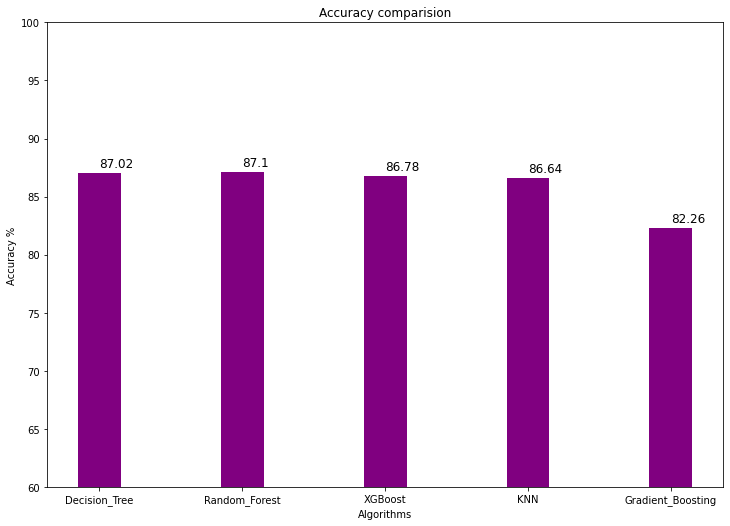

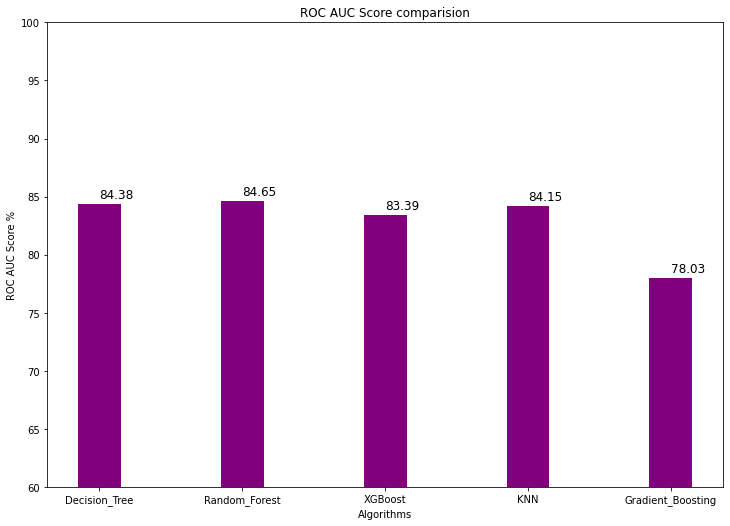

In [33]:
#Accuracy plot

fig, ax = plt.subplots(figsize = (10,7))
ax.bar(accuracy_df['Algorithm'],accuracy_df['Accuracy'],width=0.3, color='purple')
for index,data in enumerate(accuracy_df['Accuracy']):
    plt.text(x=index, y =data+0.5 , s=f"{data}" , fontdict=dict(fontsize=12))
plt.tight_layout()
plt.xlabel('Algorithms')
plt.ylabel('Accuracy %')
plt.title('Accuracy comparision')
plt.ylim([60,100])
plt.show()

#ROC AUC Score Plot

fig, ax = plt.subplots(figsize = (10,7))
ax.bar(accuracy_df['Algorithm'],accuracy_df['ROC_AUC_SCORE'],width=0.3, color='purple')
for index,data in enumerate(accuracy_df['ROC_AUC_SCORE']):
    plt.text(x=index, y =data+0.5 , s=f"{data}" , fontdict=dict(fontsize=12))
plt.tight_layout()
plt.xlabel('Algorithms')
plt.ylabel('ROC AUC Score %')
plt.title('ROC AUC Score comparision')
plt.ylim([60,100])
plt.show()

#### Plotting Confusion matrix

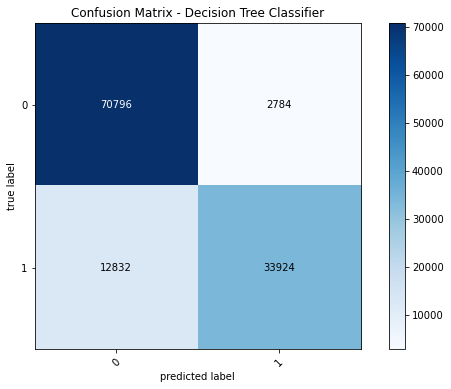

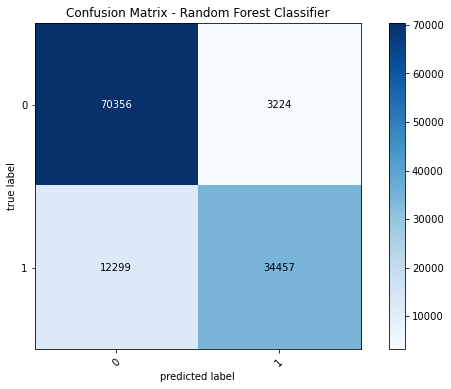

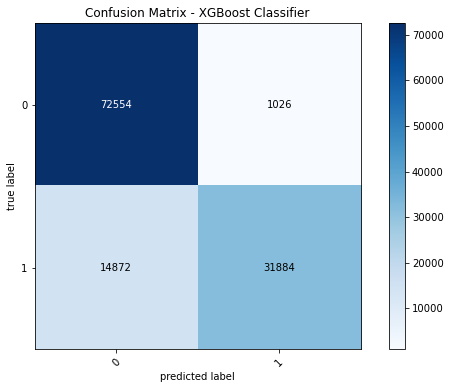

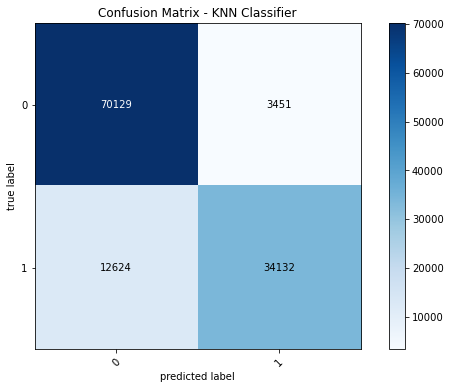

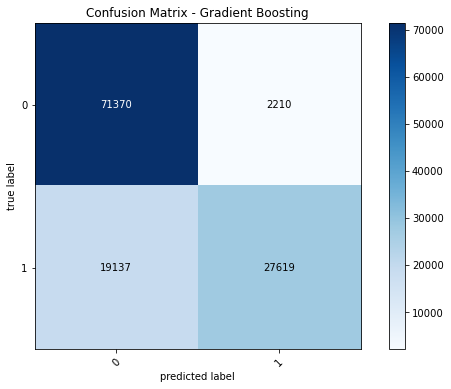

In [34]:
target_attack = [0,1]

fig, ax = plot_confusion_matrix(conf_mat=results,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=False,
                                class_names=target_attack, 
                               figsize=(10,6))
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()

fig, ax = plot_confusion_matrix(conf_mat=results_rf,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=False,
                                class_names=target_attack, 
                               figsize=(10,6))
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

fig, ax = plot_confusion_matrix(conf_mat=results_xgb,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=False,
                                class_names=target_attack, 
                               figsize=(10,6))
plt.title('Confusion Matrix - XGBoost Classifier')
plt.show()

fig, ax = plot_confusion_matrix(conf_mat=results_knn,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=False,
                                class_names=target_attack, 
                               figsize=(10,6))
plt.title('Confusion Matrix - KNN Classifier')
plt.show()

fig, ax = plot_confusion_matrix(conf_mat=results_gb,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=False,
                                class_names=target_attack, 
                               figsize=(10,6))
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

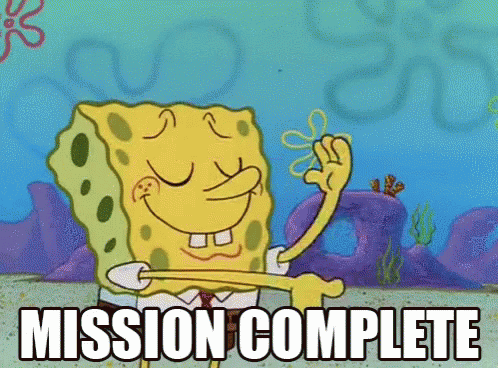